<a href="https://colab.research.google.com/github/paolapeiz/THE_CORE/blob/main/Mi_Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MI Proyecto IA


In [107]:
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

3.10.0
GPU Available: []
2.19.0


In [108]:
!pip install tensorflow

In [109]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Task
Load, preprocess, and train a neural network model on the Fashion MNIST dataset, evaluate its performance, visualize predictions, and summarize its ability to differentiate between fashion items.

## Load Fashion MNIST Dataset

### Subtask:
Load the Fashion MNIST dataset, which contains images of various clothing items, to replace the current MNIST dataset.


**Reasoning**:
The subtask requires loading the Fashion MNIST dataset. I will use a code block to import the `fashion_mnist` module from `keras.datasets` and then load the training and test sets into the specified variables.



In [110]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Fashion MNIST dataset loaded successfully.")
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Fashion MNIST dataset loaded successfully.
Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


## Preprocess Data

### Subtask:
Normalize the image pixel values from 0-255 to 0-1 and reshape the data if necessary for the model.


**Reasoning**:
I will normalize the image pixel values and reshape the images to add a channel dimension as specified in the instructions. Then, I will print the new shapes to confirm the preprocessing steps.



In [111]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

print(f"New train images shape: {train_images.shape}")
print(f"New test images shape: {test_images.shape}")

New train images shape: (60000, 28, 28, 1)
New test images shape: (10000, 28, 28, 1)


## Define Model Architecture

### Subtask:
Define a neural network model (e.g., a simple CNN) suitable for classifying the Fashion MNIST images into their respective categories (shoes, shirts, bags, etc.).


**Reasoning**:
The subtask requires defining a neural network model. I will create a code block that imports the necessary Keras layers and constructs a sequential CNN model as per the instructions, including convolutional, pooling, flatten, and dense layers with appropriate activation functions and input shape.



In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("Model architecture defined successfully.")
model.summary()

Model architecture defined successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code successfully defined the model architecture, but a warning was issued. To address this, I will modify the model definition to explicitly add an `Input` layer as the first layer in the Sequential model, as suggested by the warning. This will prevent the warning from appearing in future executions. The rest of the model architecture remains the same as it correctly implements the task requirements.



In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(28, 28, 1)), # Explicitly define Input layer to avoid warning
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

print("Model architecture defined successfully.")
model.summary()

Model architecture defined successfully.


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Compile Model

### Subtask:
Compile the defined model with an appropriate optimizer, loss function, and metrics for multi-class classification.


**Reasoning**:
I need to compile the model as per the instructions, specifying 'adam' as the optimizer, 'sparse_categorical_crossentropy' as the loss function, and 'accuracy' as the metric.



In [114]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


## Train Model

### Subtask:
Train the compiled model using the preprocessed Fashion MNIST training data.


**Reasoning**:
I will train the model using the `fit` method with the specified parameters to train the model.



In [115]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_images, test_labels)
)

print("Model training completed.")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.7220 - loss: 0.7702 - val_accuracy: 0.8635 - val_loss: 0.3701
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8568 - loss: 0.3939 - val_accuracy: 0.8775 - val_loss: 0.3266
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8805 - loss: 0.3370 - val_accuracy: 0.8904 - val_loss: 0.3003
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.8906 - loss: 0.3007 - val_accuracy: 0.8969 - val_loss: 0.2740
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8948 - loss: 0.2848 - val_accuracy: 0.8893 - val_loss: 0.2994
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9078 - loss: 0.2552 - val_accuracy: 0.9078 - val_loss: 0.2604
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9102 - loss: 0.2407 - val_accuracy: 0.8996 - val_loss: 0.2799
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9156 -

In [116]:
print(train_images.shape)

(60000, 28, 28, 1)


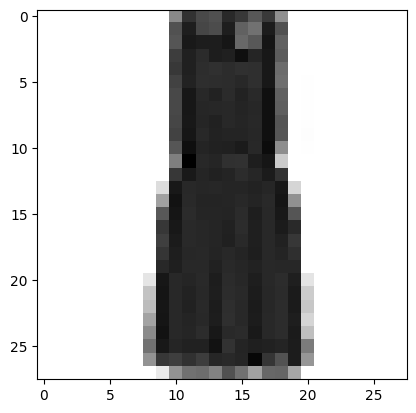

In [117]:
# Veamos el elemento 30000 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [118]:
len(train_labels)

60000

In [119]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

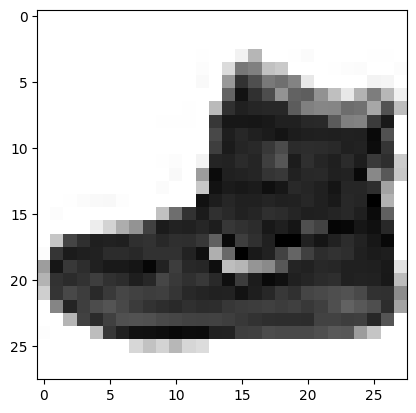

In [120]:
# Veamos el elemento 0 (que vemos que es un 5) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [121]:
test_images.shape

(10000, 28, 28, 1)

In [122]:
len(test_labels)

10000

In [123]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

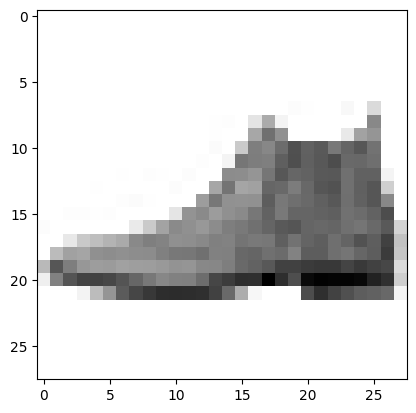

In [124]:
# Veamos el elemento 0 de test (que vemos que es un t) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [125]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers

# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas
# (también llamadas "completamente conectadas"). Cada una de las 512 neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo
# deduce.
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
# Probar 10 neuronas y 'sigmoid' <==============================================
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual
# pertenezca a una de nuestras clases de 10 dígitos.
network.add(layers.Dense(10, activation='softmax'))
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases
network.summary()
# Nombre de las capas automáticos a no ser que lo definamos
# 401.920 = 784 x 512 + 512 Sesgo
# 5.130 = 512x10 + 10 Sesgo
# 407.050 = 401.920 + 5.130

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

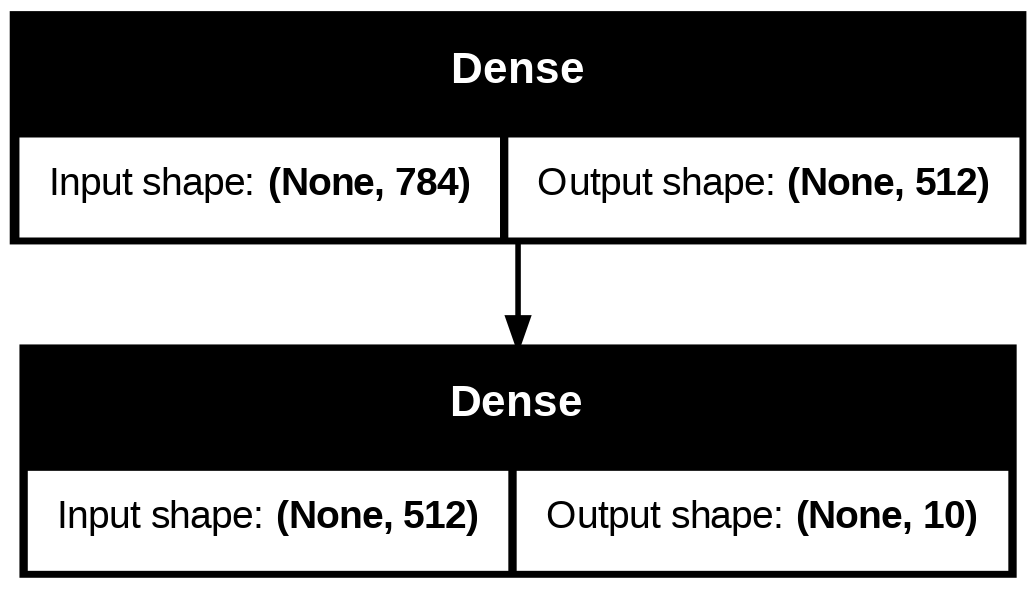

In [126]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# !pip install pydot graphviz  # Already installed, commenting out for idempotency
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

In [127]:
!pip install pydot graphviz

In [128]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
# Algoritmo optimizador rmsprop (Root Mean Square Propagation): Es un algoritmo
# similar a AdaGrad (Adaptive Gradient Algorithm) que mantiene un factor de
# entrenamiento diferente para cada dimensión, pero en este caso el escalado
# del factor de entrenamiento se realiza dividiéndolo por la media del declive
# exponencial del cuadrado de los gradientes.
network.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# 'categorical_crossentropy': La función de pérdida utilizada es apropiada para la
# clasificación multiclase con etiquetas one-hot encoded.

In [129]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.47 0.51 0.36 0.58 0.12 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.98 0.78 0.67 0.76 0.6  0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.17 0.49 0.76 0.65 0.94 1.   0.85 0.67 0.89 0.49 0.24 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.38 0.65 0.61 0.62 0.67 0.7  0.83 0.84 0.82 0.77 0.74 0.62 0.64 0.62 0.42 0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.33 0.62 0.51 0.46 0.47 0.58 0.58 0.57 0.7  0.62 0.68 0.63 0.48 0.52 0.56 0.67 0.15 0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.62 0.5  0.46 0.47 0.48 0.44 0.36 0.49 0.63 0.43 0.5  0.5  0.51 0.57 0.54 0.65 0.48 0.   0. 

In [130]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [131]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [132]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Cargar Fashion MNIST (correctamente)
(train_images, train_labels_original), (test_images, test_labels_original) = fashion_mnist.load_data()

# Nombres de las clases en orden (según la documentación de Fashion MNIST)
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']

# Si necesitas las etiquetas en formato one‑hot (para entrenar la red)
train_labels_onehot = to_categorical(train_labels_original)
test_labels_onehot = to_categorical(test_labels_original)

# Ejemplo: ver qué objeto corresponde a la imagen 30000 del conjunto de entrenamiento
indice = 30000
etiqueta_original = train_labels_original[indice]
nombre_objeto = class_names[etiqueta_original]

print(f"La imagen de entrenamiento en la posición {indice} tiene etiqueta original {etiqueta_original}")
print(f"Eso corresponde a: {nombre_objeto}")

# Si quieres ver el vector one‑hot (solo para comprobar):
print(f"Vector one‑hot en esa posición: {train_labels_onehot[indice]}")

La imagen de entrenamiento en la posición 30000 tiene etiqueta original 3
Eso corresponde a: Vestido
Vector one‑hot en esa posición: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [133]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Cargar datos
(train_images, train_labels_orig), (test_images, test_labels_orig) = fashion_mnist.load_data()

# Normalizar: convertir a float32 y escalar entre 0 y 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convertir etiquetas a one-hot
train_labels = to_categorical(train_labels_orig)
test_labels = to_categorical(test_labels_orig)

# Definir la red
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28)))   # Aplana 28x28 a 784
network.add(layers.Dense(512, activation='relu'))   # Capa oculta con 512 neuronas
# ... puedes añadir más capas si quieres
network.add(layers.Dense(10, activation='softmax')) # Capa de salida con 10 clases

# Compilar la red
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Entrenar
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# Evaluar
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Precisión en prueba:', test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7407 - loss: 0.7540
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8554 - loss: 0.3972
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8743 - loss: 0.3452
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8827 - loss: 0.3155
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8916 - loss: 0.2906
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3857
Precisión en prueba: 0.8619999885559082


In [134]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
# HEMOS UTILIZADO MENOS DE 20 LÍNEAS DE CÓDIGO...

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3857


In [135]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.37940436601638794
test_acc: 0.8619999885559082


In [136]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======
=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================
[0.   0.   0.   0.   0.   0.21 0.   0.01 0.   0.79]
=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==
[9 2 1 ... 8 1 5]
=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING
[9 2 1 ... 8 1 5]
=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========
[[798   0   5  54   2   1 136   0   4   0]
 [  0 966   0  25   2   0   6   0   1   0]
 [ 14   0 783  18  46   1 137   0   1   0]
 [ 12   5   5 931   8   0  36   0   3   0]
 [  1   1 183  67 589   1 156   0   2   0]
 [  0   0   0   1   0 981   0  12   0   6]
 [ 99   0  65  48  21   1 756   0  10   0]
 [  0   0   0   0   0  63   0 915   1  21]
 [  7   0   2   7   0   8  10   2 964   0]
 [  0   0   0   1   0  28   1  33   0 937]]
=PINTAMOS LA MATRIZ DE CONFUSION=======================================


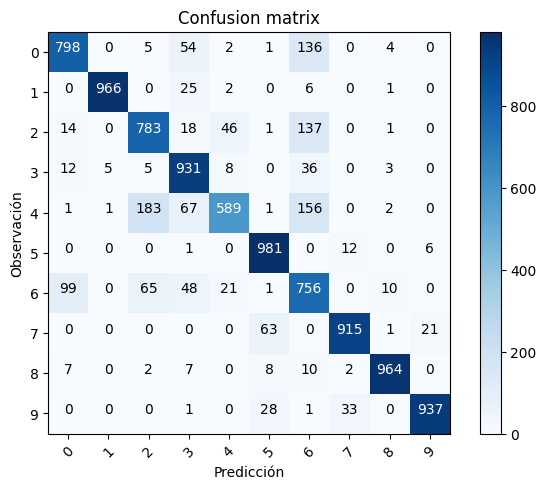

In [137]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = network.predict(test_images)
print("=VALORES QUE PREDICE EL MODELO ENTRENADO CON LAS IMAGENES DE TEST======")
print("=RECORDAR QUE LA PRIMERA IMAGEN DE TEST ERA UN 7=======================")
print(Y_pred[0])
print("=======================================================================")
# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(Y_pred, axis = 1)
print("=CONVERSION DE PREDICCIONES EN CLASES DESDE VECTORES ONE-HOT ENCODING==")
print(Y_pred_classes)
print("=======================================================================")
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1)
print("=CONVERSION DE VALORES REALES EN CLASES DESDE VECTORES ONE-HOT ENCODING")
print(Y_true)
print("=======================================================================")
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print("=MATRIZ DE CONFUSION CON VALORES REALES FRENTE A LOS PREDICHOS=========")
print(confusion_mtx)
print("=======================================================================")
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION=======================================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

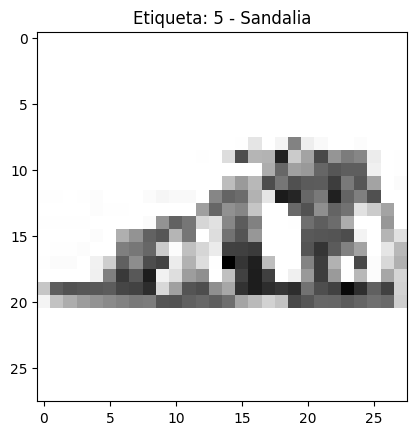

In [138]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Cargar Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Nombres de las clases (según el orden oficial de Fashion MNIST)
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']

# Mostrar la imagen en la posición 11 del conjunto de prueba
imagen = test_images[11]
etiqueta = test_labels[11]

plt.imshow(imagen, cmap=plt.cm.binary)
plt.title(f"Etiqueta: {etiqueta} - {class_names[etiqueta]}")
plt.show()

In [139]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES=================================")

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES=================================


In [140]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7395 - loss: 0.7559
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8558 - loss: 0.3976
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8733 - loss: 0.3477
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8838 - loss: 0.3133
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8930 - loss: 0.2938
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.3584
Precisión en test: 0.8674
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


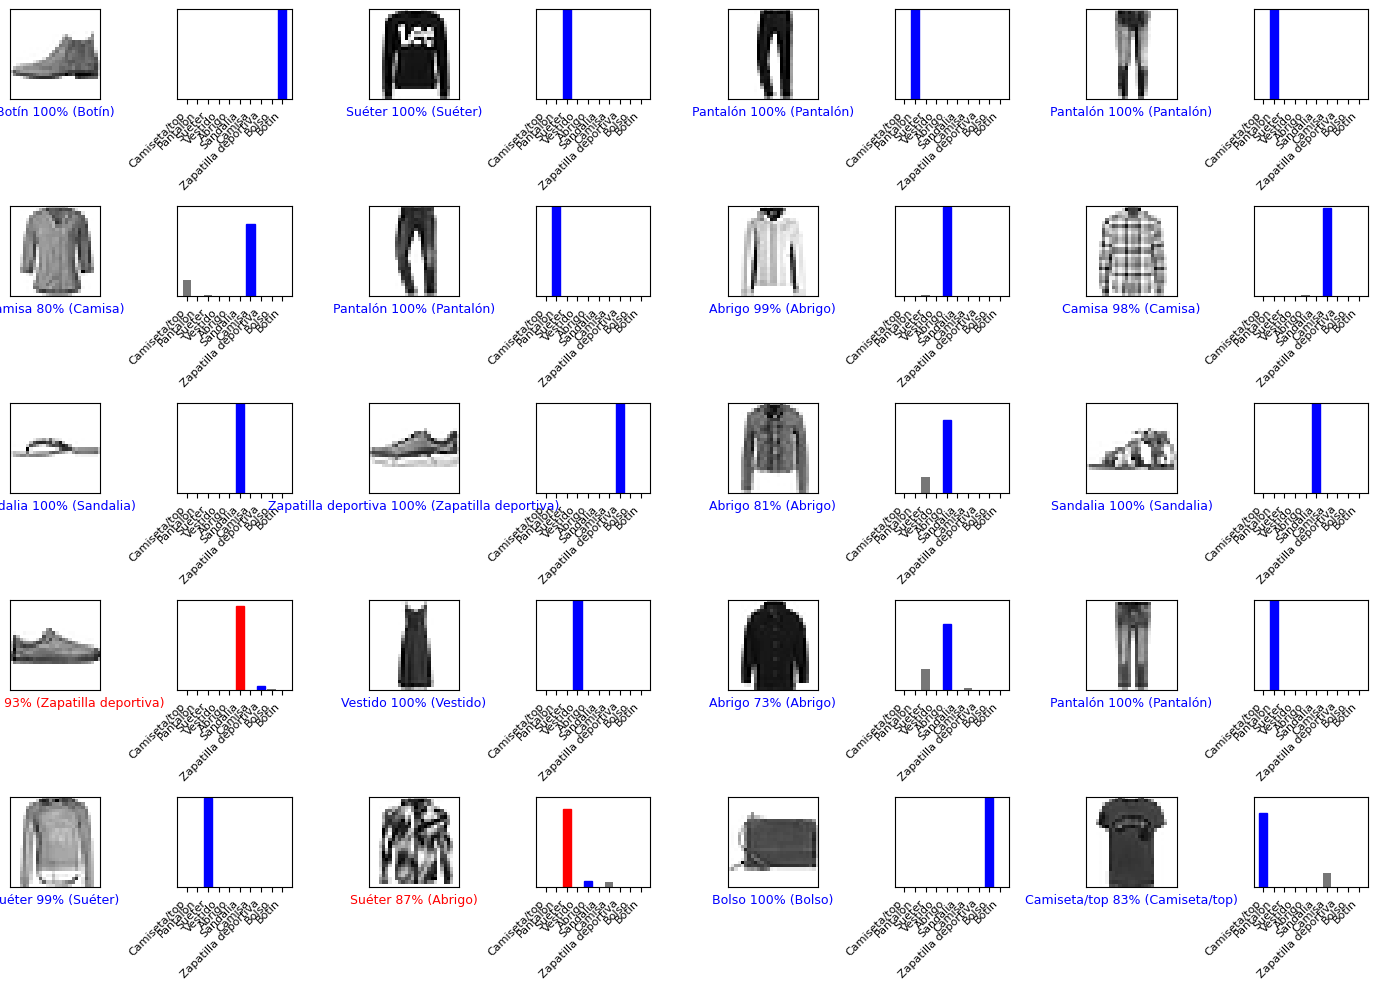

In [141]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# 1. Cargar datos
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Nombres de las clases (español, con acentos)
class_names = ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botín']

# 2. Preprocesar: aplanar y normalizar
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convertir etiquetas a one-hot (para entrenar con categorical_crossentropy)
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 3. Definir la red (especificando input_shape)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

# 4. Compilar
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# 5. Entrenar (si no lo has hecho, ajústalo a tus épocas)
network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128)

# 6. Evaluar (opcional)
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print(f'Precisión en test: {test_acc:.4f}')

# 7. Predecir
predictions = network.predict(test_images)

# 8. Funciones de visualización mejoradas
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.0f}% ({class_names[true_label]})",
               color=color, fontsize=9)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10), class_names, rotation=45, ha='right', fontsize=8)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 9. Mostrar predicciones para las primeras 20 imágenes de test
num_rows = 5
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(14, 10))  # Figura más grande
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images.reshape(10000, 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()